#  Real Estate (PySpark): DE2 Assessment
## Pre-Requisites
### Install pyspark


In [1]:
%pip install pyspark

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 2.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


### Create a SparkSession

In [3]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

spark = SparkSession.builder.appName("RealEstates").getOrCreate()

spark

## Question 1: Import the Real Estate Sales Parquet File into a Spark DataFrame object

Make sure your add the `Real_Estate_Sales_2001-2020_GL.parquet` file to your current working directory

In [5]:
file_location = './Real_Estate_Sales_2001-2020_GL.parquet'

In [6]:
# write your solution here

df = spark.read.parquet(file_location)

df.show()


+-------------+---------+-------------+----------+--------------------+--------------+-----------+-----------+-------------+----------------+------------------+--------------------+-----------+--------------------+
|serial_number|list_year|date_recorded|      town|             address|assessed_value|sale_amount|sales_ratio|property_type|residential_type|      non_use_code|    assessor_remarks|opm_remarks|            location|
+-------------+---------+-------------+----------+--------------------+--------------+-----------+-----------+-------------+----------------+------------------+--------------------+-----------+--------------------+
|      2020348|     2020|   09/13/2021|   Ansonia|     230 WAKELEE AVE|      150500.0|   325000.0|      0.463|   Commercial|            NULL|              NULL|                NULL|       NULL|                NULL|
|        20002|     2020|   10/02/2020|   Ashford|     390 TURNPIKE RD|      253000.0|   430000.0|     0.5883|  Residential|   Single Family

## Question 2: (A) Display a list of the columns in the Spark DataFrame and then (B) print the first 5 rows 

In [7]:
# A. list of columns
for column in df.columns:
    print(column)

serial_number
list_year
date_recorded
town
address
assessed_value
sale_amount
sales_ratio
property_type
residential_type
non_use_code
assessor_remarks
opm_remarks
location


In [8]:
# B. first 5 rows

df.show(5)


+-------------+---------+-------------+-------+--------------------+--------------+-----------+-----------+-------------+----------------+------------+----------------+-----------+--------+
|serial_number|list_year|date_recorded|   town|             address|assessed_value|sale_amount|sales_ratio|property_type|residential_type|non_use_code|assessor_remarks|opm_remarks|location|
+-------------+---------+-------------+-------+--------------------+--------------+-----------+-----------+-------------+----------------+------------+----------------+-----------+--------+
|      2020348|     2020|   09/13/2021|Ansonia|     230 WAKELEE AVE|      150500.0|   325000.0|      0.463|   Commercial|            NULL|        NULL|            NULL|       NULL|    NULL|
|        20002|     2020|   10/02/2020|Ashford|     390 TURNPIKE RD|      253000.0|   430000.0|     0.5883|  Residential|   Single Family|        NULL|            NULL|       NULL|    NULL|
|       200212|     2020|   03/09/2021|   Avon|   

## Question 3: Convert the `date_recorded` column to a date field 

In [17]:
from pyspark.sql.functions import to_date

# write your solution here

# df = df.withColumn("date_recorded", to_date("date_recorded", "MM/DD/YYYY"))

df.show()

+-------------+---------+-------------+----------+--------------------+--------------+-----------+-----------+-------------+----------------+------------------+--------------------+-----------+--------------------+
|serial_number|list_year|date_recorded|      town|             address|assessed_value|sale_amount|sales_ratio|property_type|residential_type|      non_use_code|    assessor_remarks|opm_remarks|            location|
+-------------+---------+-------------+----------+--------------------+--------------+-----------+-----------+-------------+----------------+------------------+--------------------+-----------+--------------------+
|      2020348|     2020|         NULL|   Ansonia|     230 WAKELEE AVE|      150500.0|   325000.0|      0.463|   Commercial|            NULL|              NULL|                NULL|       NULL|                NULL|
|        20002|     2020|         NULL|   Ashford|     390 TURNPIKE RD|      253000.0|   430000.0|     0.5883|  Residential|   Single Family

## Question 4: How many `Condo` listings are in the dataset? 

In [12]:
# write your solution here

condo_count = df.filter(df["residential_type"] == "Condo").count()

print(f"Number of Condo listings: {condo_count}")

Number of Condo listings: 117780


## Question 5: What is the average sales price by `property_type`, sorted by most expensive to least expensive?

In [15]:
# write your solution here


average_sales_by_type = df.groupBy("residential_type").mean("sale_amount") \
    .withColumnRenamed("avg(sale_amount)", "average_sales_price") \
    .orderBy("average_sales_price", ascending=False)

# Show the result
average_sales_by_type.show()

+----------------+-------------------+
|residential_type|average_sales_price|
+----------------+-------------------+
|            NULL|  435971.4810972962|
|   Single Family| 400790.31355674827|
|     Four Family| 314931.85773366416|
|           Condo| 277243.99986415345|
|      Two Family| 206955.76536897567|
|    Three Family| 203695.50235636675|
+----------------+-------------------+



## Question 6: How many properties sold for higher than their assessed value?

In [16]:
# write your solution here


higher_sales = df.filter(df["sale_amount"] > df["assessed_value"])


count_higher_sales = higher_sales.count()


print(f"Number of properties sold for higher than their assessed value: {count_higher_sales}")

Number of properties sold for higher than their assessed value: 863941


## Question 7: How have real estate sale prices changed over time?
(This question is intentionally vague, use your creativity to intepret and answer accordingly!)

Correlation between list year and sale amount: 0.6111443097825379


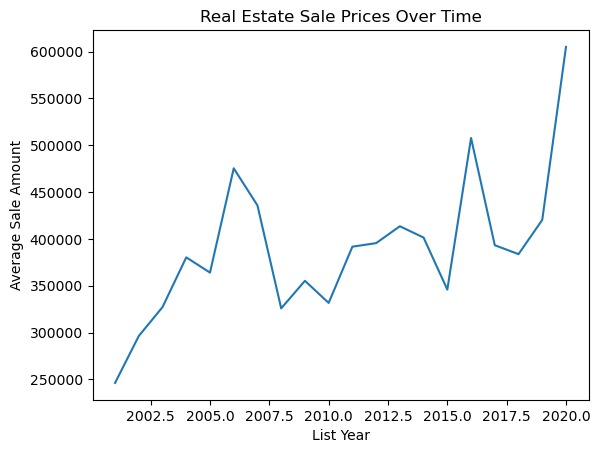

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import avg

# Calculate the average sales price for each year
average_price_by_year = df.groupBy("list_year").agg(avg("sale_amount").alias("average_sales_price")) \
    .orderBy("list_year").toPandas()

# Calculate the correlation coefficient
correlation = average_price_by_year['list_year'].corr(average_price_by_year['average_sales_price'])

# Print the correlation coefficient
print(f"Correlation between list year and sale amount: {correlation}")

# Create a line plot to visualize the trend
plt.plot(average_price_by_year['list_year'], average_price_by_year['average_sales_price'])
plt.xlabel("List Year")
plt.ylabel("Average Sale Amount")
plt.title("Real Estate Sale Prices Over Time")
plt.show()